#### Student Name: Galina Lopez 
#### Student Number: 10333429
##### Module: Advanced Data Analytics
##### CA1b: Optimisation




In [1]:
%matplotlib inline

from numpy import *
from matplotlib.pyplot import *
import seaborn as sns   

Plot each of the target functions using matplotlib

First function  y = (x - 1)^2 

(-1, 6)

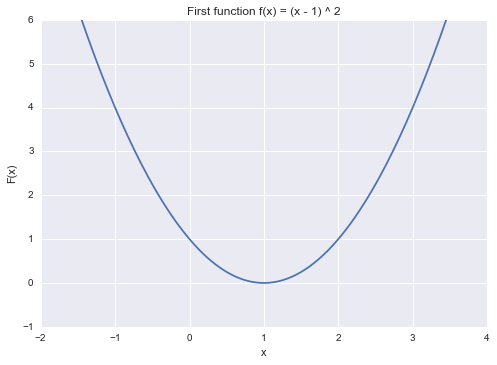

In [2]:
x = linspace(-2, 4, 200)
y = (x**2 - 2*x + 1)

figure()      # Make a new figure
plot(x, y)    # Plot some data
title('First function f(x) = (x - 1) ^ 2') # Put a title
xlabel('x')   # Label the x axis
ylabel('F(x)')# Label the y axis
ylim(-1,6)    # Specify the range of the y axis shown

As we can see from the above graph the first function y = (x - 1)^2 is a convex function ie. with a unique global optimum, 
a global minimum in this case at x = 1 f(x) = 0.

Second function  y = x(x + 1.5)(x - 1.5)(x - 2)

(-4, 4)

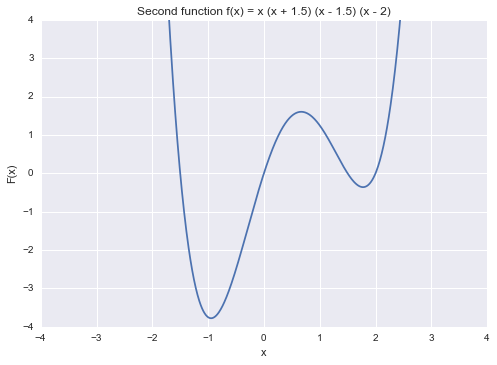

In [3]:
x = linspace(-4, 4, 1000)
y = (x**4 - 2*x**3 -2.25*x**2 + 4.5*x)

plot(x, y)    # Plot some data
title('Second function f(x) = x (x + 1.5) (x - 1.5) (x - 2)') # Put a title
xlabel('x')   # Label the x axis
ylabel('F(x)')# Label the y axis
ylim(-4,4)    # Specify the range of the y axis shown

As we can see from the above graph the second function y = x(x + 1.5)(x - 1.5)(x - 2) is a multi modal convex function ie. 
with a mixture of global and local optima, in this case a global minimum at x = -0.946, a local minimum at x = 1.7768 
and a local maximum at x = 0.669.

Use random search on each of the target functions

Plot the best performance of this method vs number of points examined

Plot the points of the function this method examines

In [4]:
import random

# Define the functions

def f(x):
    return x**2 - 2*x + 1

def f2(x):
    return x**4 - 2*x**3 -2.25*x**2 + 4.5*x

# Random search algorithm

def random_search(f, a, b, start_best_y, points):

    best_y = start_best_y
    random_x = []
    random_y = []

    for i in range(points):
        
        x = random.randint(a, b)
        random_x.append(x)          
        y = f(x)
        random_y.append(y)        
        plot(x,y, marker='o', color = 'b')

        if y < best_y:
            best_x = x
            best_y = y
            
    plot(best_x, best_y, marker = 'o', color = 'r')  
    title('First Graph: Random Search on Function')
    xlabel('x') 
    ylabel('F(x)')
    figure()
    plot(random_x, random_y, linestyle = "", marker = 'o')
    title('Second Graph') 
    xlabel('x') 
    ylabel('F(x)')
    figure()
    plot(random_x, random_y, marker = 'o')
    title('Third Graph') 
    xlabel('x')   
    ylabel('F(x)')
    
    return best_x, best_y

Random search is a brute force optimisation algorithm, so it will randomly search for the best solution, ie. an x that gives the 
minimum y value until the stopping criteria is met at which point it will produce it as its result. It cannot guarantee to find 
the global or local optimum solutions.

Random search best performance
f(2.000000) = 1.000000


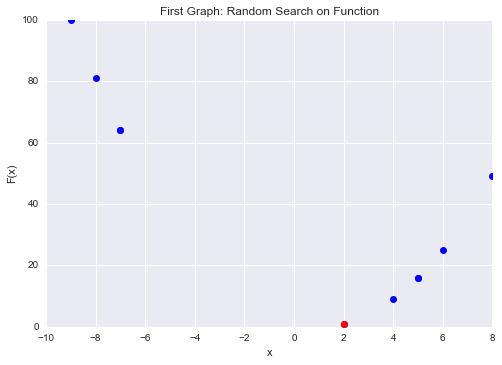

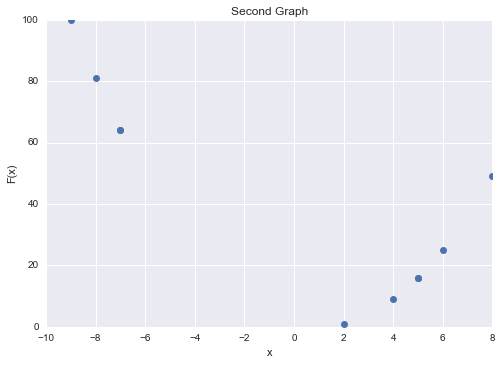

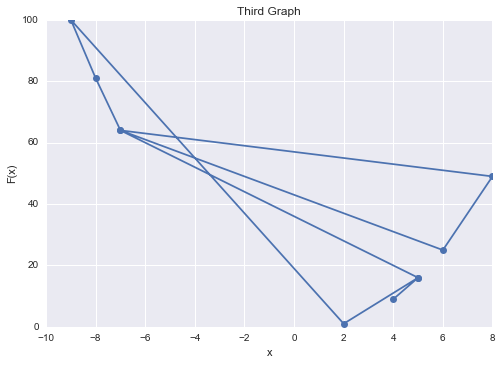

In [5]:
# Define interval, big value to initialise best_y as it is a minimisation problem and the number of random points to search
a = -10
b = 10
start_best_y = 1000
points = 10

# Perform random search on first function
x_min, fx_min = random_search(f, a, b, start_best_y, points)
print "Random search best performance"
print "f(%f) = %f" % (x_min, fx_min)

The above first graph shows a plot of the random points the algorithm searched on the first function with the best solution 
plotted in red.
The second graph plots the points of the function this method examined. As we can see, they can be anywhere in the first function, in the interval we defined to randomly search.
The third graph shows a plot of the randomness of the search.

Random search best performance
f(-2.000000) = 14.000000


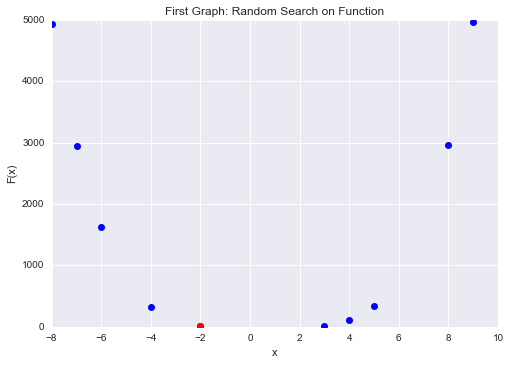

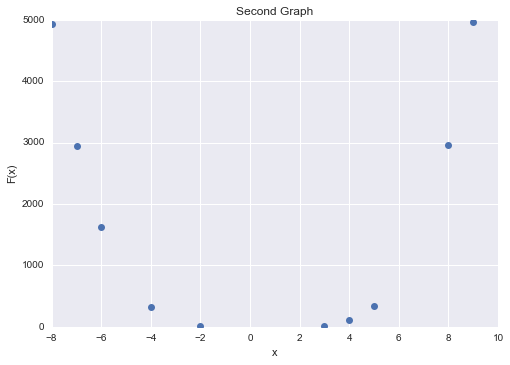

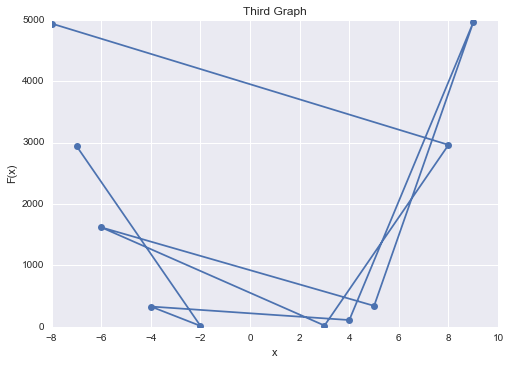

In [6]:
# Perform random search on second function
x_min, fx_min = random_search(f2, a, b, start_best_y, points)
print "Random search best performance"
print "f(%f) = %f" % (x_min, fx_min)

The above first graph shows a plot of the random points the algorithm searched on the second function with the best solution 
plotted in red.
The second graph plots the points of the function this method examined. As we can see, they can be anywhere in the second function, 
in the interval we defined to randomly search.
The third graph shows a plot of the randomness of the search.

Use hillclimbing on each of the target functions

Plot the best performance of this method vs number of points examined

Plot the points of the function this method examines

In [7]:
# Define the neighbors function

def neighbors(x):
    return x - 0.1, x + 0.1

# Hill climbing algorithm

def hill_climbing(f, start):
    
    x = start
    fx = f(x)

    neighborhood = iter(neighbors(x))
    been_here = False
    hill_x = []
    hill_y = []

    # Search for an x that miximizes f(x), considering neighbors(x)
    while True:
        
        x2 = neighborhood.next( )
        fx2 = f(x2)
        
        plot(x2, fx2, marker = 'o', color = 'b')
        hill_x.append(x2)
        hill_y.append(fx2)
        
        if fx2 < fx:
            x, fx = x2, fx2            
            neighborhood = iter(neighbors(x)) 
            been_here = False
        else:
            if been_here == True:
                break
            been_here = True
            
    plot(x, fx, marker = 'o', color = 'r')  
    title('First Graph: Hill Climbing on Function')
    xlabel('x') 
    ylabel('F(x)')
    figure()    
    plot(hill_x, hill_y, marker = 'o')
    title('Second Graph: Function examined by Hill Climbing')
    xlabel('x') 
    ylabel('F(x)')
    
    return x, fx

Hill climbing is a greedy optimisation algorithm which belongs to the family of local search. It is an iterative algorithm that
starts with an arbitrary solution to a problem, then attempts to find a better solution by incrementally changing a single 
element of the solution. It can get stuck on local minimum on multi modal convex functions as a result.

Hill climbing best performance
f(1.000000) = 0.000000


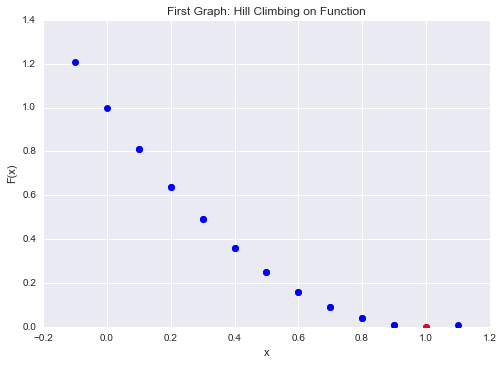

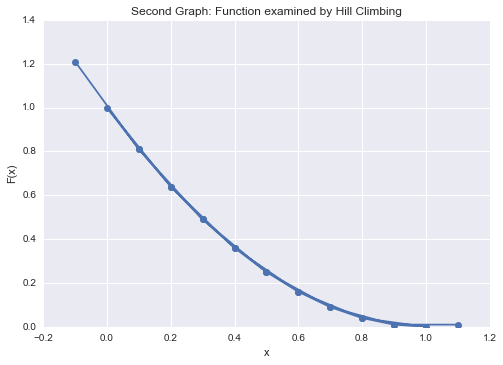

In [8]:
# Perform hill climbing on first function starting at 0
start = 0

x_min, fx_min = hill_climbing(f, start)
print "Hill climbing best performance"
print "f(%f) = %f" % (x_min, fx_min)

The above first graph shows a plot of the points the algorithm searched on the first function with the best solution plotted in red, in this case x = 1, f(x) = 0. Since the first function is a convex function, it has a unique global minimun at x = 1 which this algorithm was able to find.
The second graph plots the points of the function this method examined. As we can see, they take a fixed step size at a time until the best solution is reached and stopping criteria is triggered.

Hill climbing best performance
f(-0.900000) = -3.758400


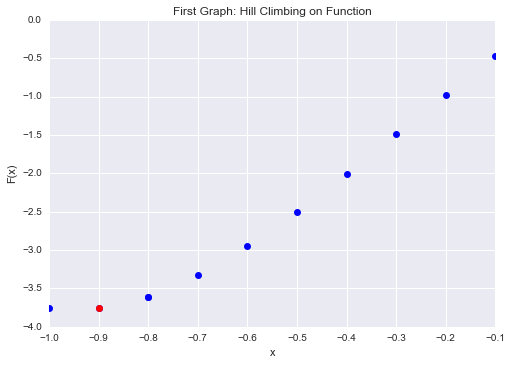

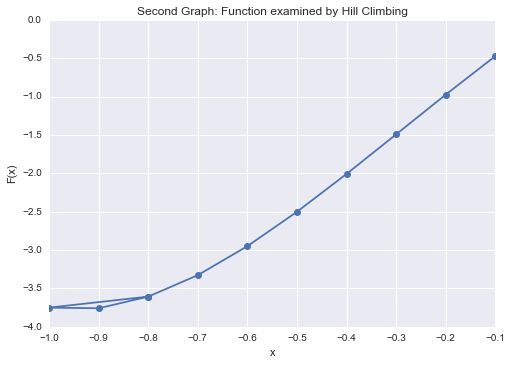

In [9]:
# Perform hill climbing on second function starting at 0
start = 0

x_min, fx_min = hill_climbing(f2, start)
print "Hill climbing best performance"
print "f(%f) = %f" % (x_min, fx_min)

The above first graph shows a plot of the points the algorithm searched on the second function starting at x = 0 with the best 
solution plotted in red, in this case x = -0.9, f(x) = -3.7584. Since the second function is a multi modal convex function, it 
has a mixture
of global minimun and local minimum. In this case since we started at x = 0 the hill climbing algorithm was able to find the global minimum.
The precision of the solution depends on the size of the step we take. There is a trade off between precision and running time 
when using this algorithm.
The second graph plots the points of the function this method examined. As we can see, they take a fixed step size at a time until the best solution is reached and stopping criteria is triggered.

Hill climbing best performance
f(1.800000) = -0.356400


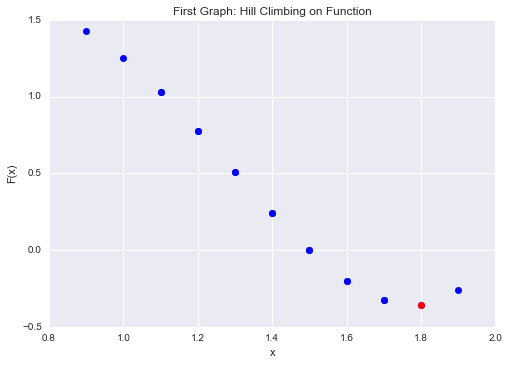

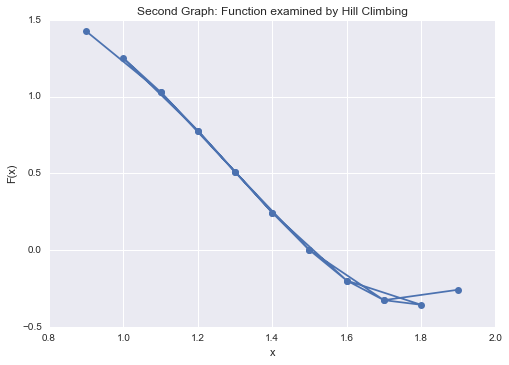

In [10]:
# Perform hill climbing on second function starting at 1
start = 1

x_min, fx_min = hill_climbing(f2, start)
print "Hill climbing best performance"
print "f(%f) = %f" % (x_min, fx_min)

The above first graph shows a plot of the points the algorithm searched on the second function this time starting at x = 1 with 
the best 
solution plotted in red, in this case x = 1.8, f(x) = -0.3564. Since the second function is a multi modal convex function, it 
has a mixture
of global minimun and local minimum. In this case since we started at x = 1 the hill climbing algorithm got stuck on the local 
minimum so was not able to find the global minimum.
The precision of the solution depends on the size of the step we take. There is a trade off between precision and running time 
when using this algorithm.
The second graph plots the points of the function this method examined. As we can see, they take a fixed step size at a time until the best solution is reached and stopping criteria is triggered.

Use gradient descent on each of the target functions

Plot the best performance of this method vs number of points examined

Plot the points of the function this method examines

In [11]:
# Define the derivative functions

def f_derivative(x):
    return 2 * x - 2

def f2_derivative(x):
    return 4*x**3 - 6*x**2 - 4.5*x + 4.5

# Gradient descent algorithm

def gradient_descent(f, f_derivative, start, old_start, step_size, precision_value):

    x_old = old_start # The value does not matter as long as abs(x_new - x_old) > precision
    x_new = start     # The algorithm starts at this value
    gamma = step_size # Step size
    precision = 0.001

    gradient_x = []
    gradient_y = []
    plot(x_new, f(x_new), marker = 'o', color = 'b')
    gradient_x.append(x_new)
    gradient_y.append(f(x_new))

    while abs(x_new - x_old) > precision:
        
        x_old = x_new   
        x_new = x_old - gamma * f_derivative(x_old)
        plot(x_new, f(x_new), marker = 'o', color = 'b')
        gradient_x.append(x_new)
        gradient_y.append(f(x_new))
        
    plot(x_new, f(x_new), marker = 'o', color = 'r') 
    title('First Graph: Gradient Descent on Function')
    xlabel('x') 
    ylabel('F(x)')
    figure()
    plot(gradient_x, gradient_y, marker = 'o')
    title('Second Graph: Function examined by Gradient Descent')
    xlabel('x') 
    ylabel('F(x)')
    
    return x_new, f(x_new)    

Gradient descent is also a greedy first-order iterative optimization algorithm. To find a local minimum of a function using 
gradient descent, one takes steps proportional to the negative of the gradient (or of the approximate gradient) of the function 
at the current point. It can get stuck on local minimum on multi modal convex functions as well.

Gradient descent best performance
f(0.996222) = 0.000014


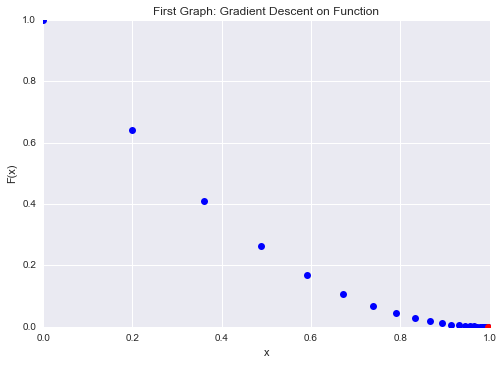

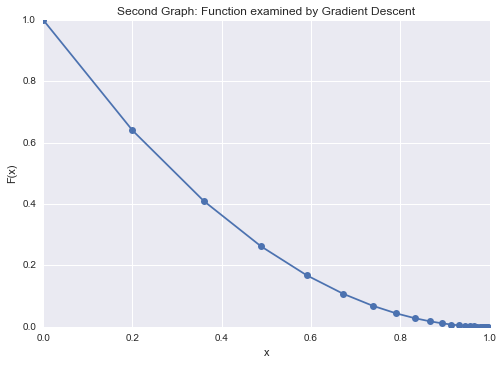

In [12]:
# Perform gradient descent on first function starting at 0
start = 0
old_start = -1
step = 0.1
precision = 0.001

x_min, fx_min = gradient_descent(f, f_derivative, start, old_start, step, precision)
print "Gradient descent best performance"
print "f(%f) = %f" % (x_min, fx_min)

The above first graph shows a plot of the points the algorithm searched on the first function with the best solution plotted in red, 
in this case x = 0.996222, f(x) = 0.000014. Since the first function is a convex function, it has a unique global minimun at x = 1 which this algorithm was able to find.
The precision of the solution depends on the precision value we use as the stopping criteria. There is a trade off between precision and running time when using this algorithm.
The second graph plots the points of the function this method examined. As we can see, they take a step size proportional to the 
negative of the gradient at a time until the best solution is reached and stopping criteria is triggered.

Gradient descent best performance
f(-0.946446) = -3.776504


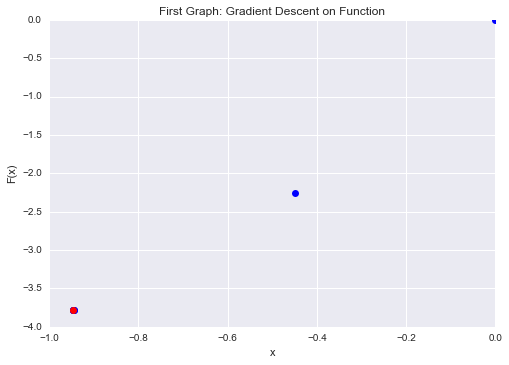

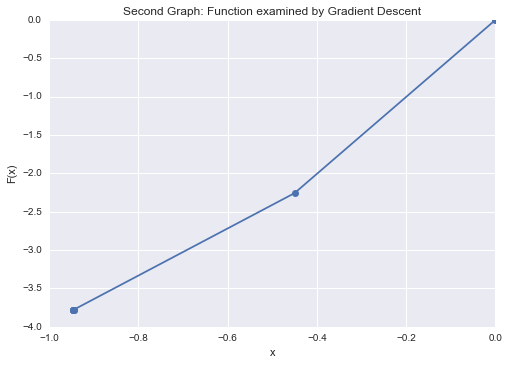

In [13]:
# Perform gradient descent on second function starting at 0
start = 0
precision = 0.0001

x_min, fx_min = gradient_descent(f2, f2_derivative, start, old_start, step, precision)
print "Gradient descent best performance"
print "f(%f) = %f" % (x_min, fx_min)

The above first graph shows a plot of the points the algorithm searched on the second function starting at x = 0 with the best 
solution plotted in red, in this case x = -0.946446, f(x) = -3.776504. Since the second function is a multi modal convex function, it has a mixture
of global minimun and local minimum. In this case since we started at x = 0 the gradient descent algorithm was able to find the global minimum.
The precision of the solution depends on the precision value we use as the stopping criteria. There is a trade off between precision and running time when using this algorithm.
The second graph plots the points of the function this method examined. As we can see, they take a step size proportional to the gradient of the function at a time until the best solution is reached and stopping criteria is triggered.

Gradient descent best performance
f(1.776748) = -0.359707


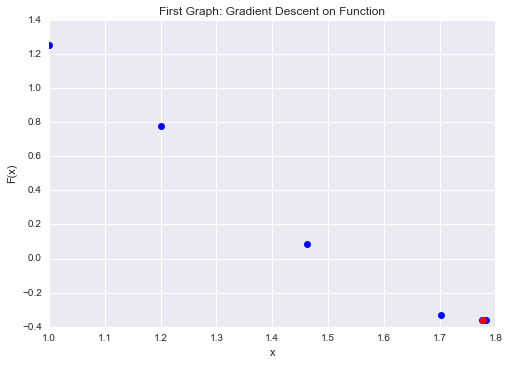

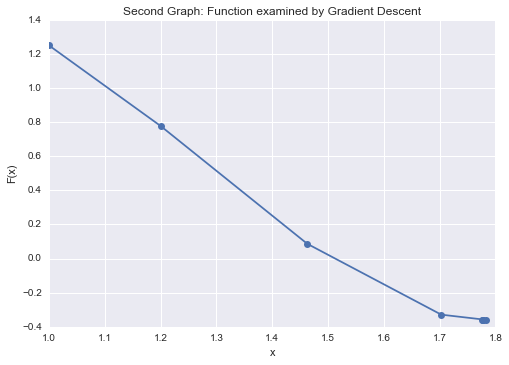

In [14]:
# Perform gradient descent on second function starting at 1
start = 1

x_min, fx_min = gradient_descent(f2, f2_derivative, start, old_start, step, precision)
print "Gradient descent best performance"
print "f(%f) = %f" % (x_min, fx_min)

The above first graph shows a plot of the points the algorithm searched on the second function starting at x = 1 this time, with the best solution plotted in red, in this case x = 1.776748, f(x) = -0.359707. Since the second function is a multi modal convex function, it has a mixture
of global minimun and local minimum. In this case since we started at x = 1 the gradient descent algorithm got stuck on the local minimum so was not able to find the global minimum.
The precision of the solution depends on the precision value we use as the stopping criteria. There is a trade off between precision and running time when using this algorithm.
The second graph plots the points of the function this method examined. As we can see, they take a step size proportional to the gradient of the function at a time until the best solution is reached and stopping criteria is triggered.

Use simulated annealing on each of the target functions at each of the starting
locations

Plot the best performance of this method vs number of points examined

Plot the points of the function this method examines

In [15]:
import numpy

# Simulated annealing algorithm

def simulated_annealing(f, start, a, b, cooling_factor = 0.8, nrand = 10, \
              maxiter = 10000, min_gamma = 1e-8, max_non_improving_steps = 5):
    
    alpha = 1.0
    random_numbers_per_trial = nrand
    gamma_reduction_factor = cooling_factor
    
    gamma = 0.5 * (b - a)
    x  = start
    fx = f(x)
    x_min  = x
    fx_min = fx
    non_improving_steps = 0
    annealing_x = []
    annealing_fx = []
    
    plot(x, fx, 'bo')
    annealing_x.append(x)
    annealing_fx.append(fx)

    iter = 0
    while gamma >= min_gamma and iter < maxiter:

        # Generate normally distributed random numbers centered around x,
        # rejecting any that lie outside the interval [a,b]

        nr = 0
        while nr <= 0:
            u = numpy.random.normal(x, gamma, random_numbers_per_trial)
            u.sort()
            u = u[u.searchsorted(a):u.searchsorted(b)]
            nr = len(u)

        # Determine the function value at each of the random points, find the
        # minimum value and also the random value that gave it

        fu = f(u)
        i = fu.argmin()
        fu_min = fu[i]
        u_min = u[i]
        
        plot(u_min, fu_min, 'bo')
        annealing_x.append(u_min)
        annealing_fx.append(fu_min)
        
        # Have we found an improvement over our current center point?  If so,
        # use it; if not, select a new center point chosen from the current
        # random distribution

        if fu_min < fx:
            x  = u_min
            fx = fu_min
        else:
            p = numpy.exp(alpha * (fx - fu))
            p = p / p.sum()
            t = numpy.random.random()
            i = 0
            s = p[i]
            while s < t and i < nr:
                i = i + 1
                s = s + p[i]
            x  = u[i]
            fx = fu[i]
            
            plot(x, fx, 'bo')
            annealing_x.append(x)
            annealing_fx.append(fx)

        # See if we've found an improved minimum.  If we've not found one in a
        # while, reduce gamma (i.e. cool the system) and try again

        if fx < fx_min:
            x_min  = x
            fx_min = fx
            non_improving_steps = 0
        else:
            non_improving_steps += 1
            if non_improving_steps > max_non_improving_steps:
                non_improving_steps = 0
                gamma = gamma_reduction_factor * gamma
                x  = x_min
                fx = fx_min      
        iter += 1

    plot(x_min, fx_min, 'ro')    
    title('First Graph: Simulated Annealing on Function')
    xlabel('x') 
    ylabel('F(x)')
    figure()
    plot(annealing_x, annealing_fx, linestyle = "", marker = 'o')
    title('Second Graph')
    xlabel('x') 
    ylabel('F(x)')
    figure()
    plot(annealing_x, annealing_fx, marker = 'o')
    title('Third Graph')
    xlabel('x') 
    ylabel('F(x)')
    
    return (x_min, fx_min)

Simulated annealing is a probabilistic technique for approximating the global optimum of a given function. Specifically, it is a metaheuristic to approximate global optimization in a large search space. Simulated annealing interprets slow cooling as a slow decrease in the probability of accepting worse solutions as it explores the solution space. Accepting worse solutions is a fundamental property of metaheuristics because it allows for a more extensive search for the optimal solution. Thus it can find global minimum and not get stuck in local ones.

In [16]:
# Define interval and cooling factor
a = -5
b = 5
cooling_factor = 0.8

Simulated annealing best performance
f(1.000000) = 0.000000


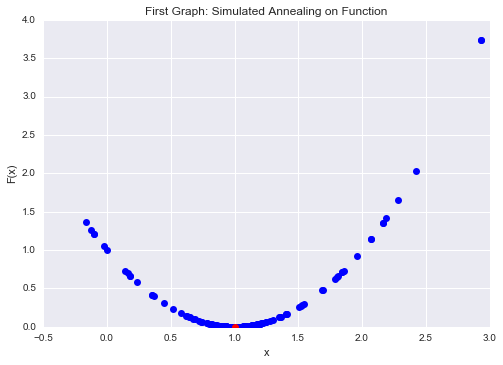

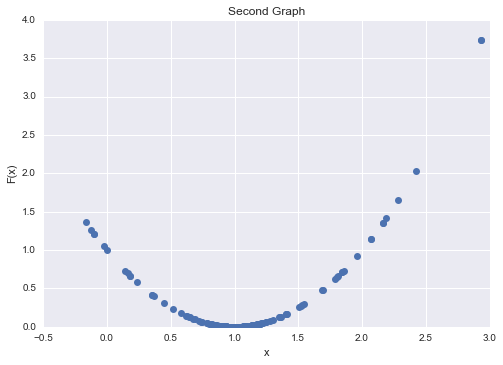

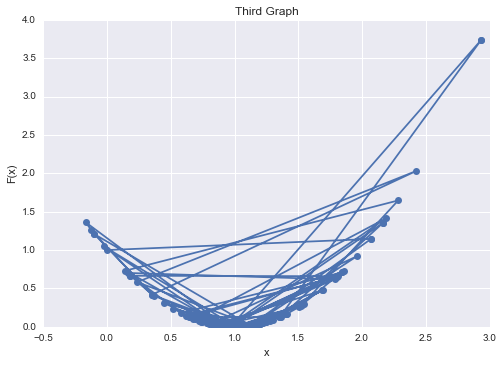

In [17]:
# Define start
start = 0

# Perform simulated annealing on first function starting at 0
x_min, fx_min = simulated_annealing(f, start, a, b, cooling_factor)
print "Simulated annealing best performance"
print "f(%f) = %f" % (x_min, fx_min)

The above first graph shows a plot of the points the algorithm searched on the first function with the best solution plotted in red, 
in this case x = 1, f(x) = 0. Since the first function is a convex function, it has a unique global minimun at x = 1 which this algorithm was able to find.
The second graph plots the points of the function this method examined. As we can see, there is initial randomness on the search where it searches wide on the function until it settles.
The third graph shows this randomness.

Simulated annealing best performance
f(-0.946065) = -3.776505


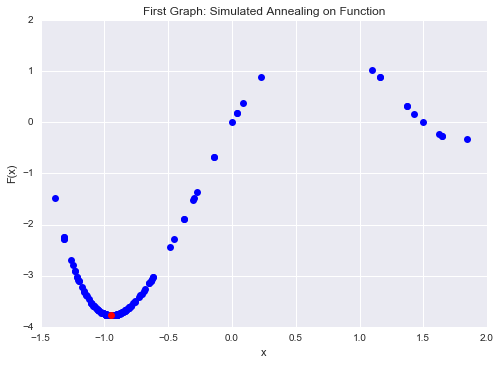

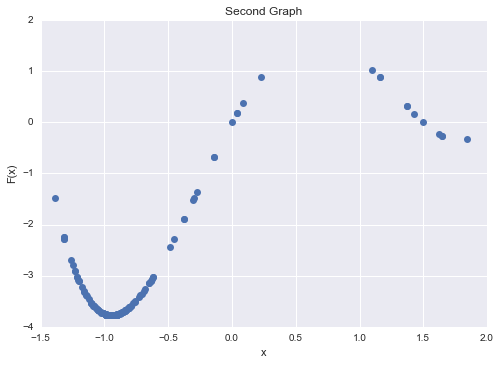

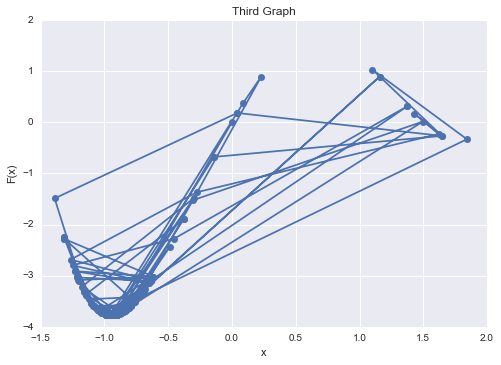

In [18]:
# Define start
start = 0

# Perform simulated annealing on second function starting at 0
x_min, fx_min = simulated_annealing(f2, start, a, b, cooling_factor)
print "Simulated annealing best performance"
print "f(%f) = %f" % (x_min, fx_min)

The above first graph shows a plot of the points the algorithm searched on the second function starting at 0 with the best solution plotted in red, 
in this case x = -0.946065, f(x) = -3.776505. The second function is a multi modal convex function, it has a mixture of global and local minimun. This algorithm was able to find the global minimum.
The second graph plots the points of the function this method examined. As we can see, there is initial randomness on the search where it searches wide on the function until it settles.
The third graph shows this randomness.

Simulated annealing best performance
f(-0.946065) = -3.776505


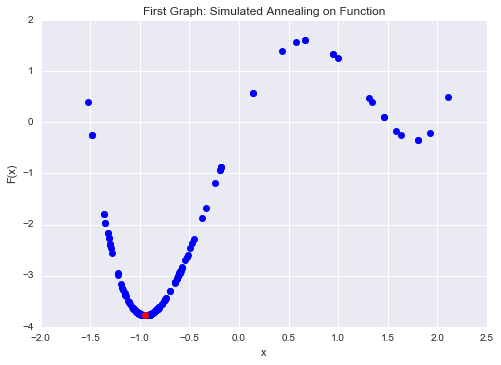

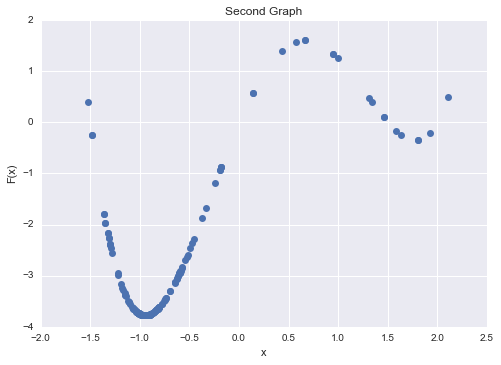

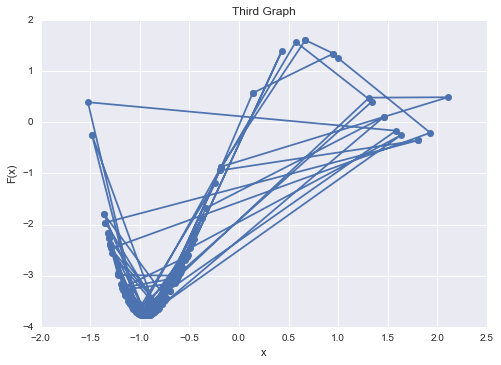

In [19]:
# Define start
start = 1

# Perform simulated annealing on second function starting at 1
x_min, fx_min = simulated_annealing(f2, start, a, b, cooling_factor)
print "Simulated annealing best performance"
print "f(%f) = %f" % (x_min, fx_min)

The above first graph shows a plot of the points the algorithm searched on the second function starting at 1 this time, with the best solution plotted in red, 
in this case x = -0.946065, f(x) = -3.776505. The second function is a multi modal convex function, it has a mixture of global and local minimun. This algorithm was able to find its global minimum once again. Hence simulated annealing did not get stuck on the local minimum unlike previous greedy algorithms as it uses metaheuristics to perform a more extensive search for the optimum solution ie the global minimum in this case.
The second graph plots the points of the function this method examined. As we can see, there is initial randomness on the search where it searches wide on the function until it settles.
The third graph shows this randomness.